In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import skimage.io
from tqdm import tqdm

plt.rcParams["figure.figsize"] = (20, 10)

In [42]:
# the labels have been augmented with pixel counts
labels = pd.read_csv("./processed_data/train_labels_aug.csv")

In [43]:
labels[:5]

,image_id,InChI,inchi_tokenized,pixel_count
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...,InChI=1S / C 13 H 20 O S / c 1 - 9 ( 2 ) 8 - 1...,852.0
1,000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...,InChI=1S / C 21 H 30 O 4 / c 1 - 12 ( 22 ) 25 ...,830.0
2,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...,InChI=1S / C 24 H 23 N 5 O 4 / c 1 - 14 - 13 -...,2302.0
3,000026b49b7e,InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...,InChI=1S / C 17 H 24 N 2 O 4 S / c 1 - 12 ( 20...,599.0
4,000026fc6c36,InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...,InChI=1S / C 10 H 19 N 3 O 2 S / c 1 - 15 - 10...,399.0


In [60]:
def check_single_image(image_id: str, threshold=2048, print_image=False):
    x = image_id
    image_path = os.path.join("./data/train", f"{x[0]}/{x[1]}/{x[2]}/{x}.png")
    image_array = skimage.io.imread(image_path)

    pixel_count = np.sum(image_array == 0)

    if print_image and pixel_count > threshold and random.random() < 0.01:
        print(f"pixel count {pixel_count}")
        image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 2, 1)
        plt.imshow(image)

#         print(np.asarray(np.where(image_array == 0)).T)

        indices = np.where(image_array.ravel() == 0)[0]
        to_replace = np.random.permutation(indices)[:len(indices)-threshold]
        image_array[np.unravel_index(to_replace, image_array.shape)] = 255

        pixel_count = np.sum(image_array == 0)
        print(f"new pixel count {pixel_count}")
        image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 2, 2)
        plt.imshow(image)

        plt.show()

    sparsity = pixel_count / (image_array.shape[0] * image_array.shape[1])

    return pixel_count, sparsity

In [66]:
def check_images(labels, threshold):
    image_ids = labels["image_id"]

    pcs = []
    sparsities = []

    for image_id in image_ids:
        try:
            pc, s = check_single_image(image_id, threshold, print_image=True)
            pcs.append(pc)
            sparsities.append(s)
        except FileNotFoundError:
            break
    
    return pcs, sparsities

pixel count 3261
new pixel count 2048


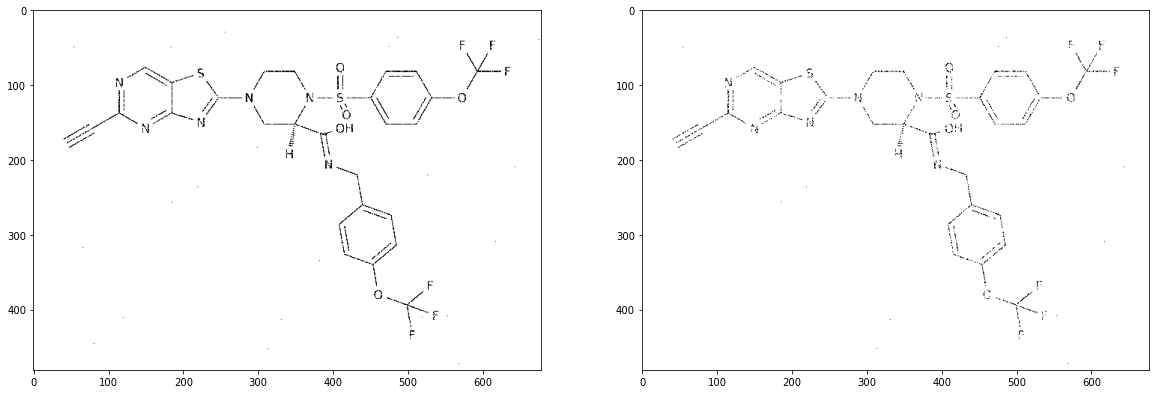

pixel count 2274
new pixel count 2048


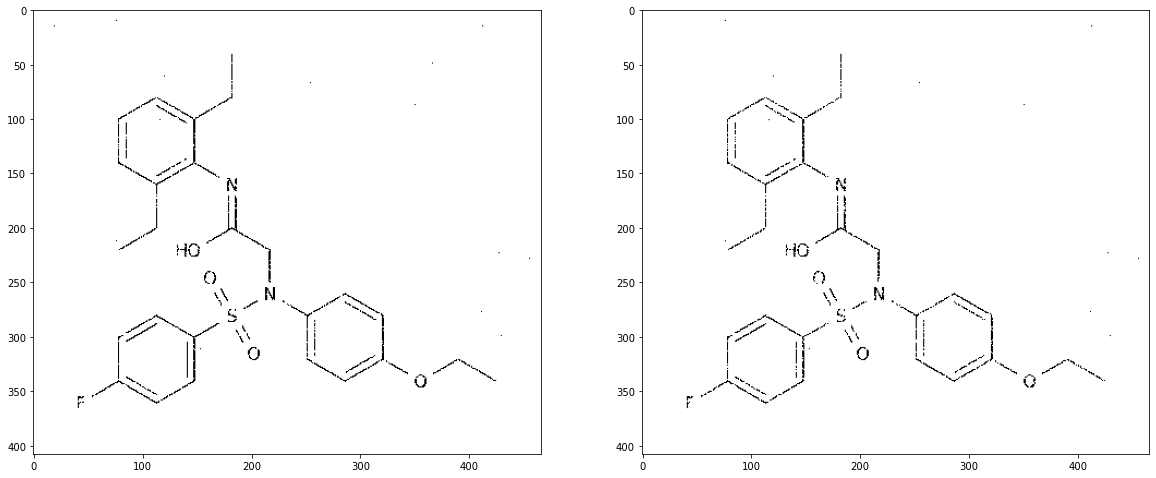

pixel count 2152
new pixel count 2048


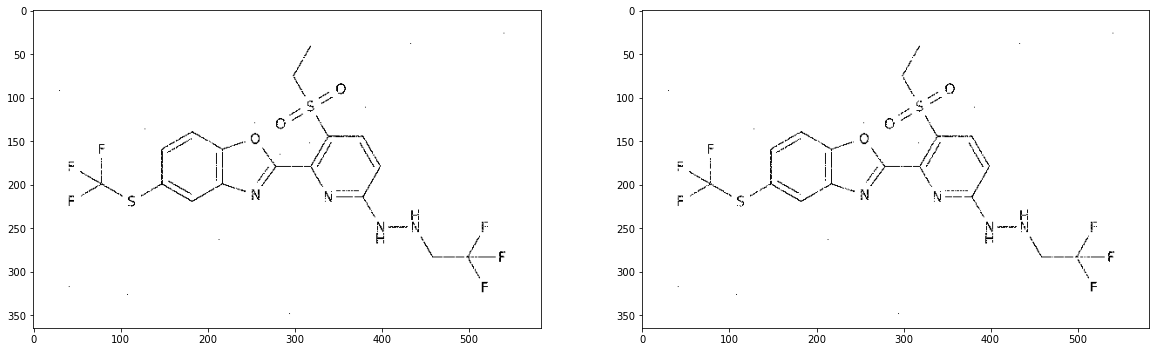

pixel count 2602
new pixel count 2048


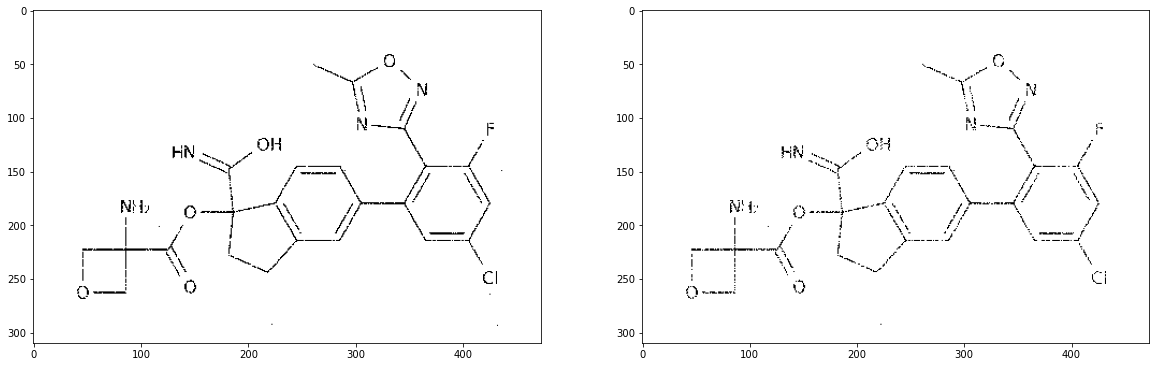

pixel count 2378
new pixel count 2048


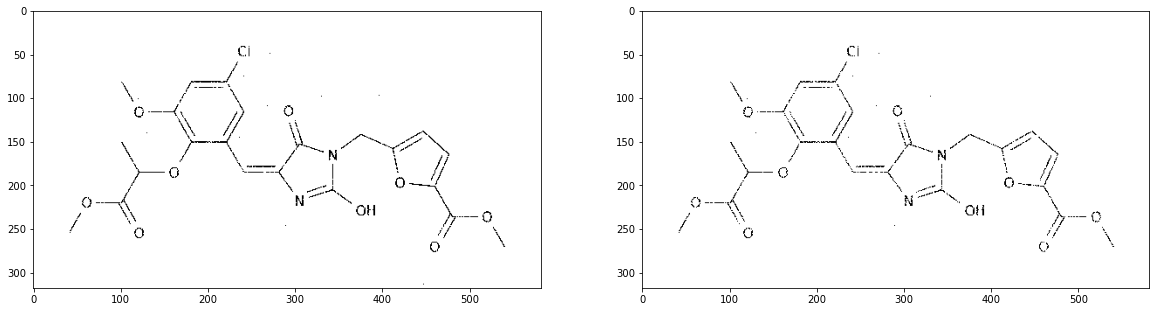

pixel count 2399
new pixel count 2048


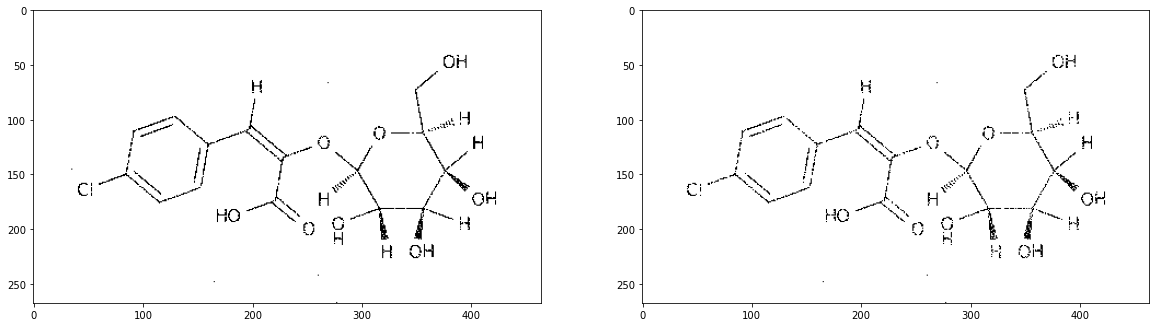

pixel count 2276
new pixel count 2048


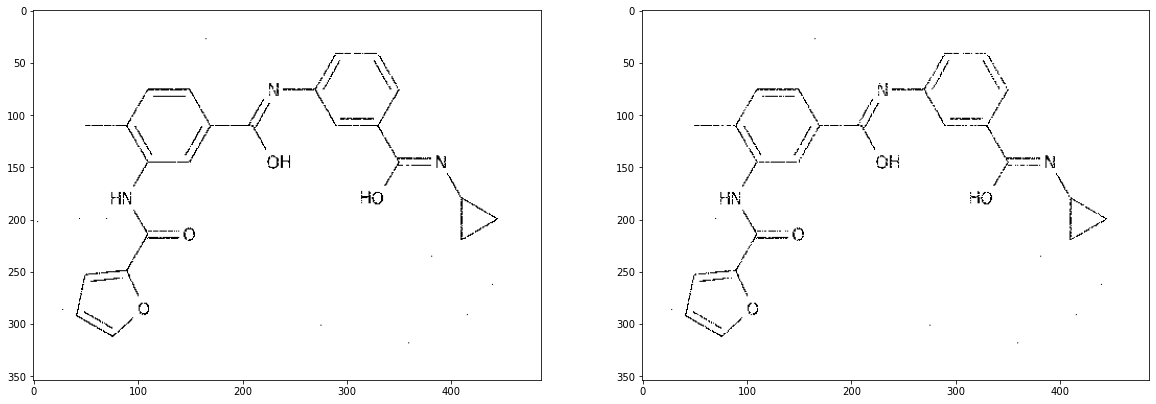

pixel count 2549
new pixel count 2048


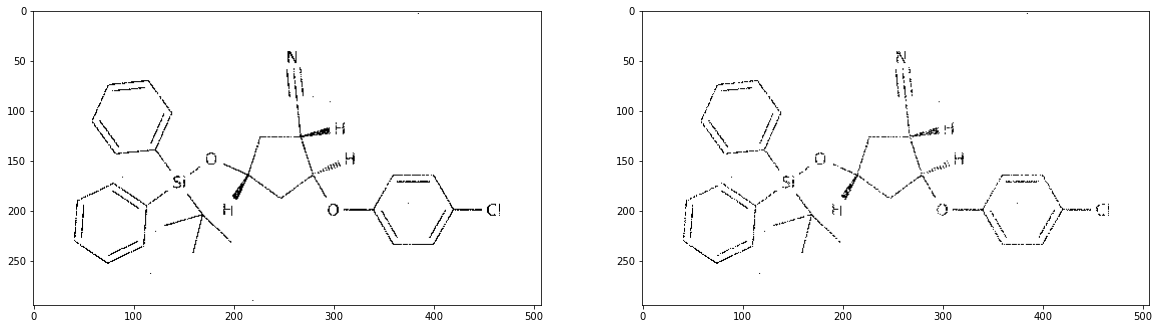

pixel count 2769
new pixel count 2048


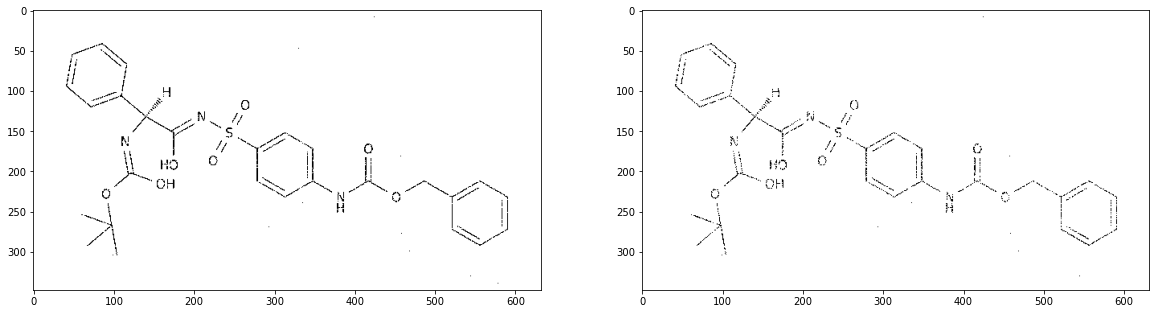

pixel count 2072
new pixel count 2048


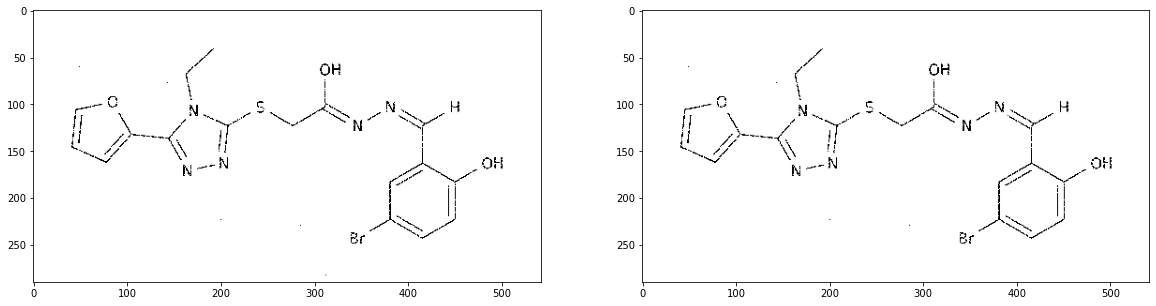

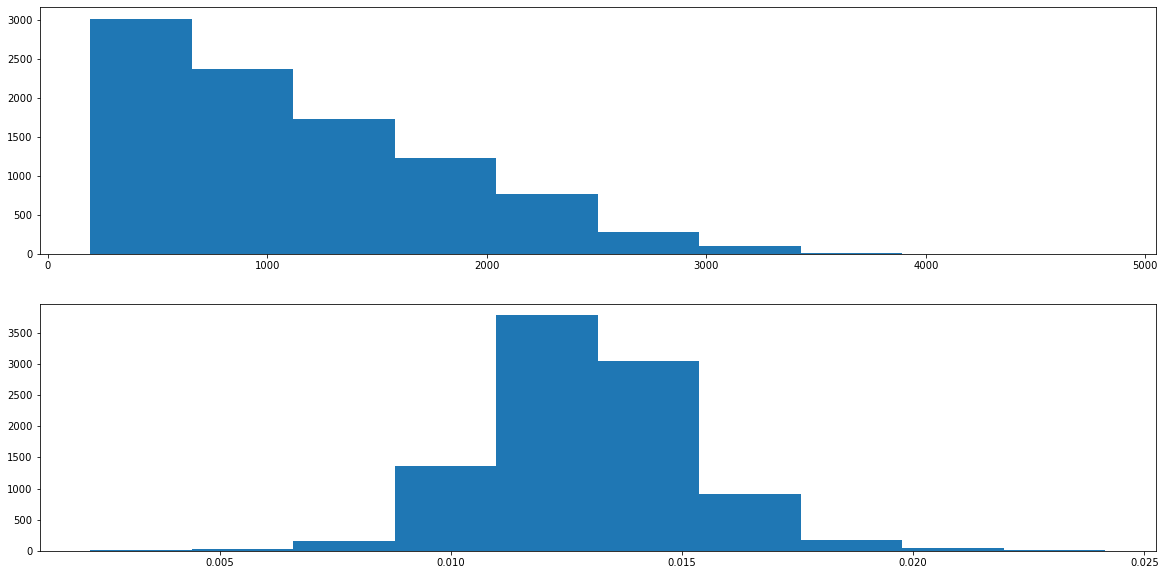

In [67]:
pcs, sparsities = check_images(labels, threshold=2048)

plt.subplot(2, 1, 1)
plt.hist(pcs)
plt.subplot(2, 1, 2)
plt.hist(sparsities)
plt.show()

pixel count 3199
new pixel count 1024


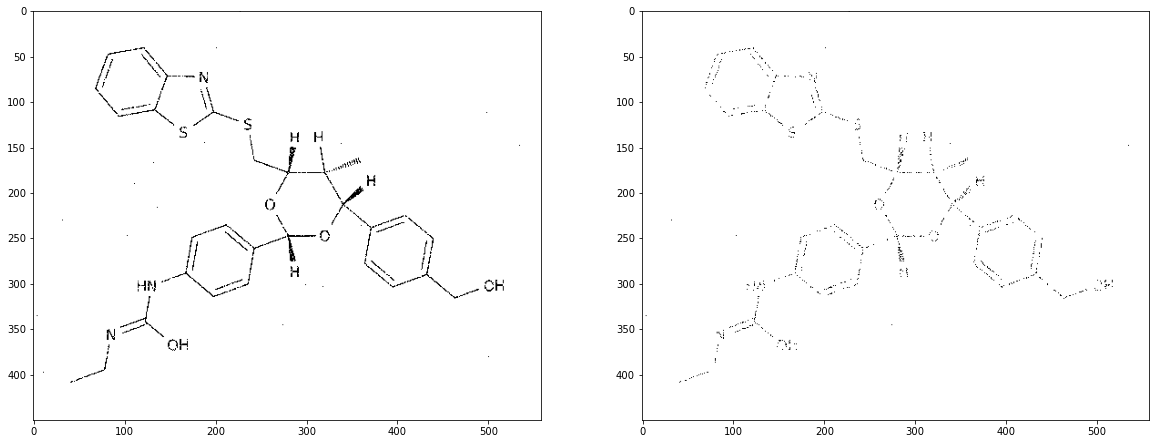

pixel count 1168
new pixel count 1024


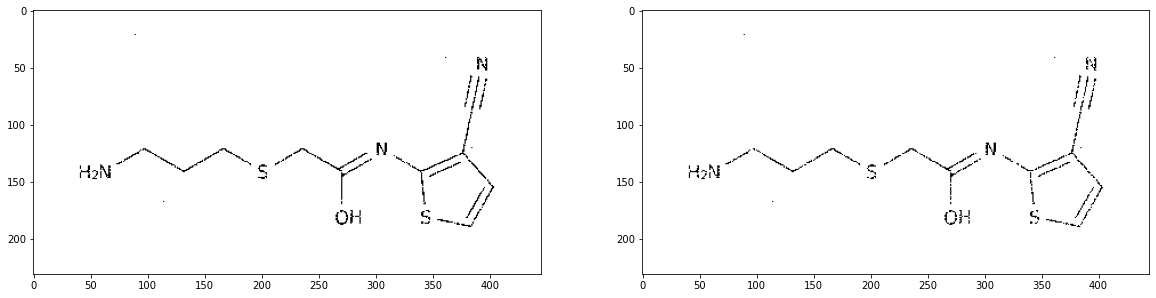

pixel count 1509
new pixel count 1024


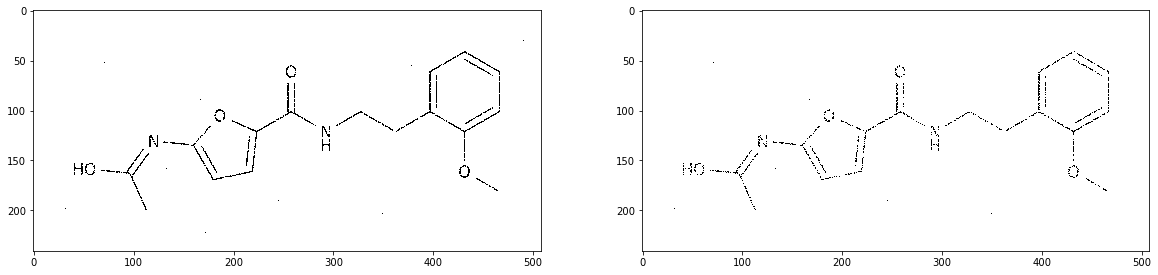

pixel count 1596
new pixel count 1024


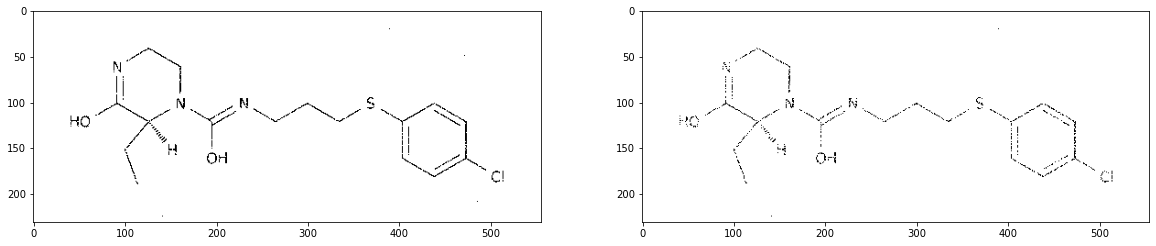

pixel count 1400
new pixel count 1024


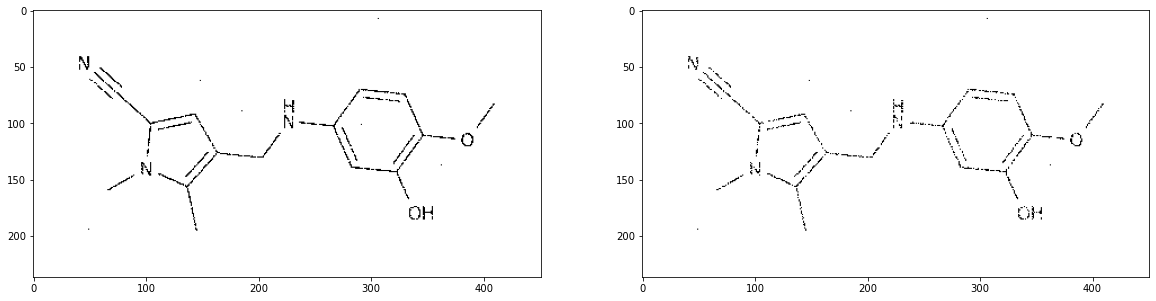

pixel count 1497
new pixel count 1024


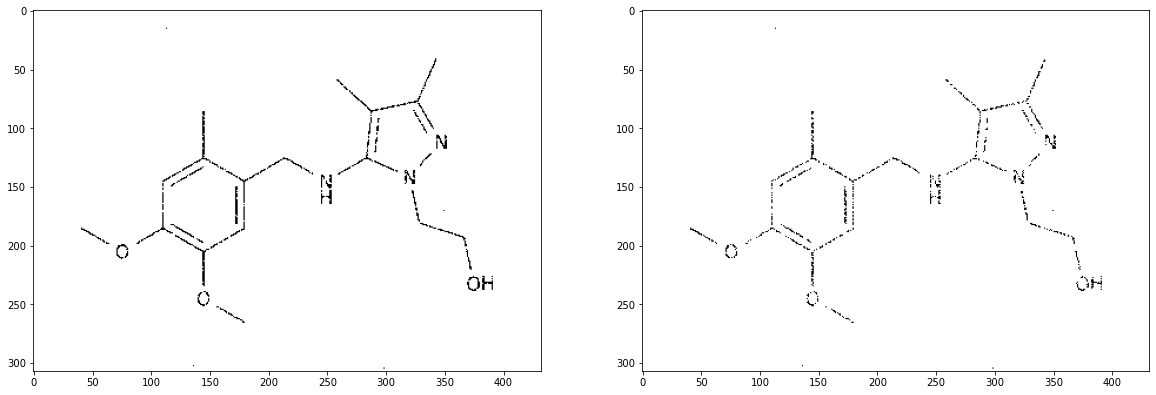

pixel count 1606
new pixel count 1024


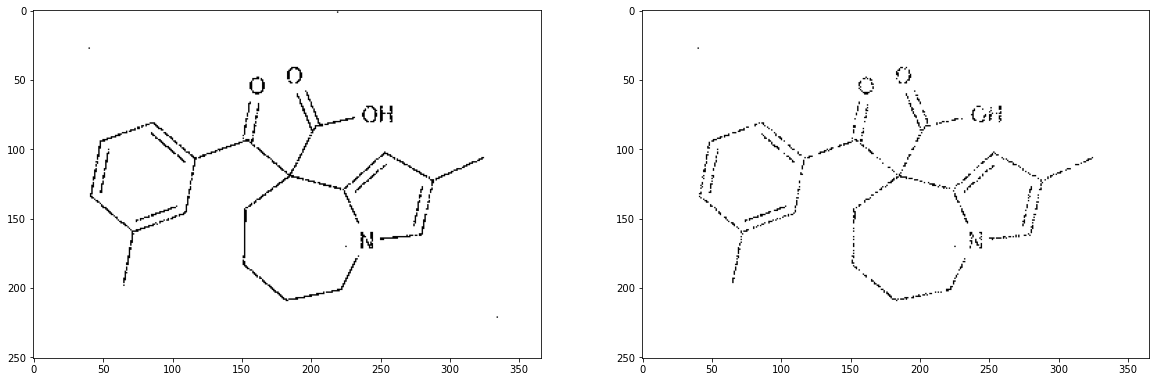

pixel count 2429
new pixel count 1024


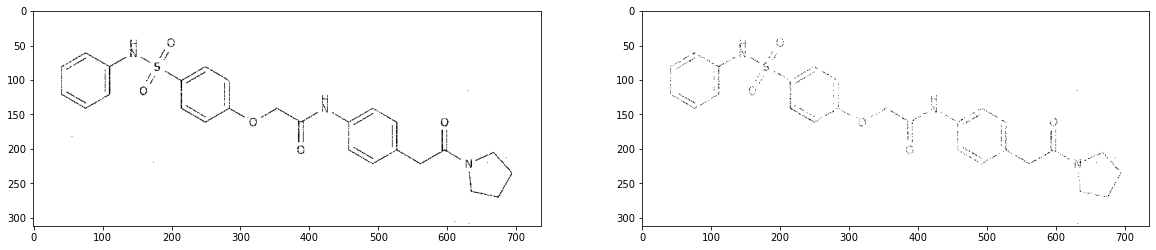

pixel count 2201
new pixel count 1024


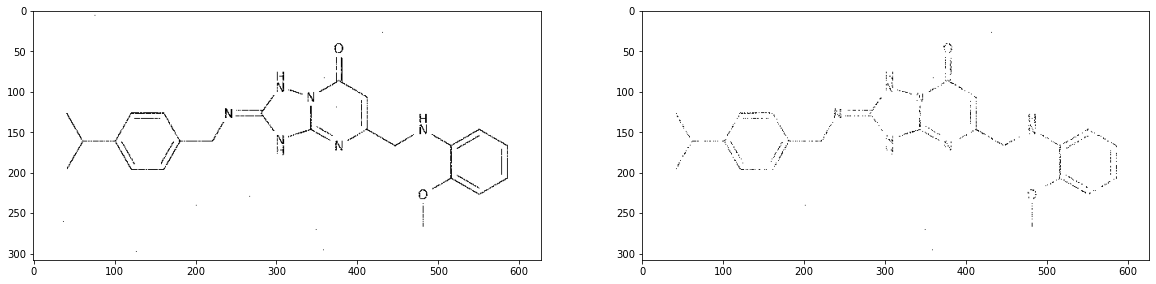

pixel count 1198
new pixel count 1024


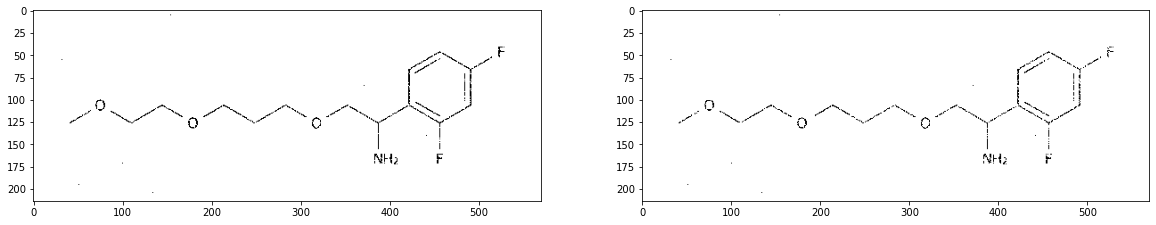

pixel count 2458
new pixel count 1024


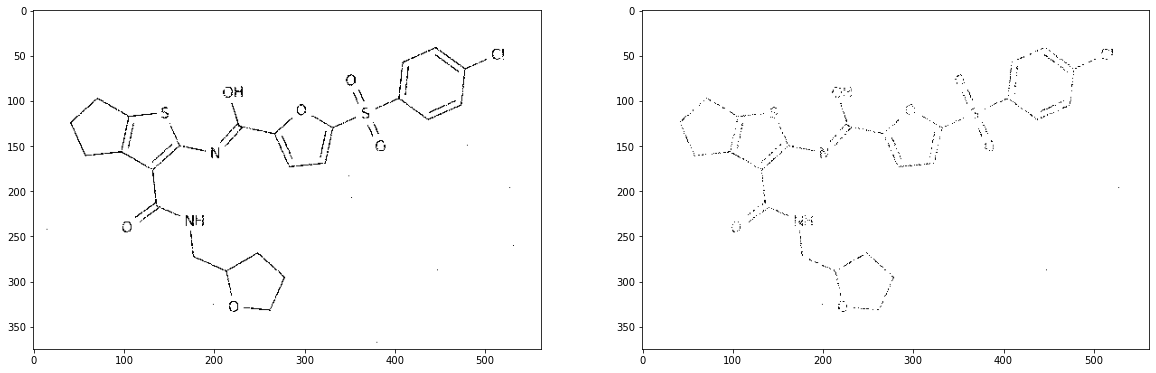

pixel count 1262
new pixel count 1024


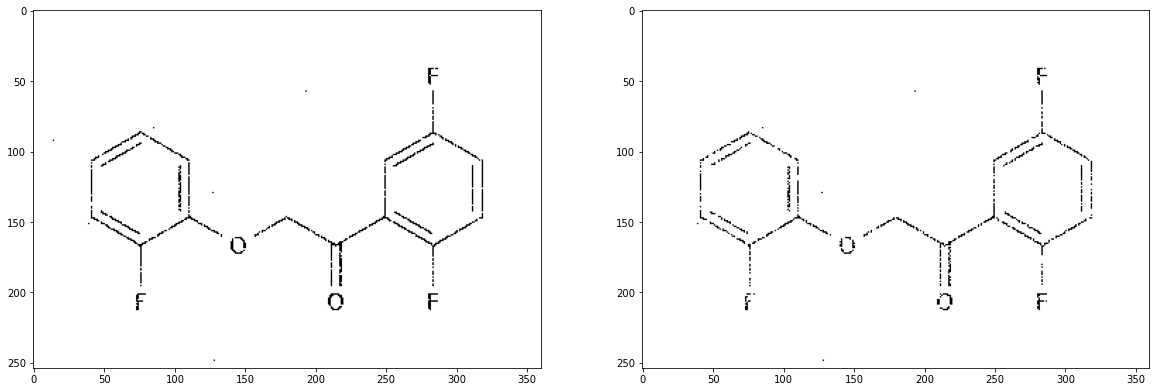

pixel count 1871
new pixel count 1024


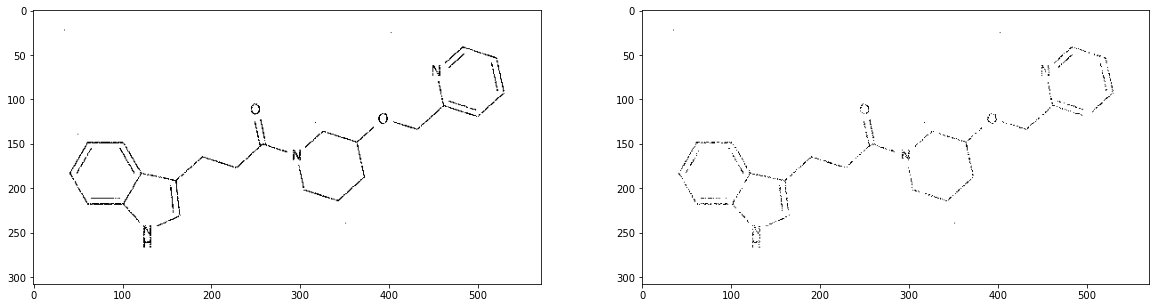

pixel count 1313
new pixel count 1024


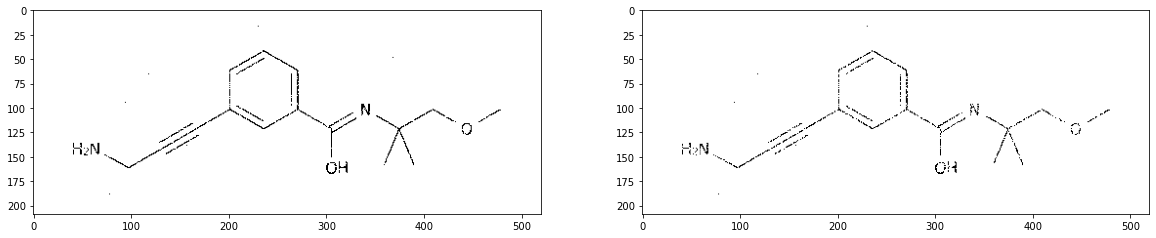

pixel count 1760
new pixel count 1024


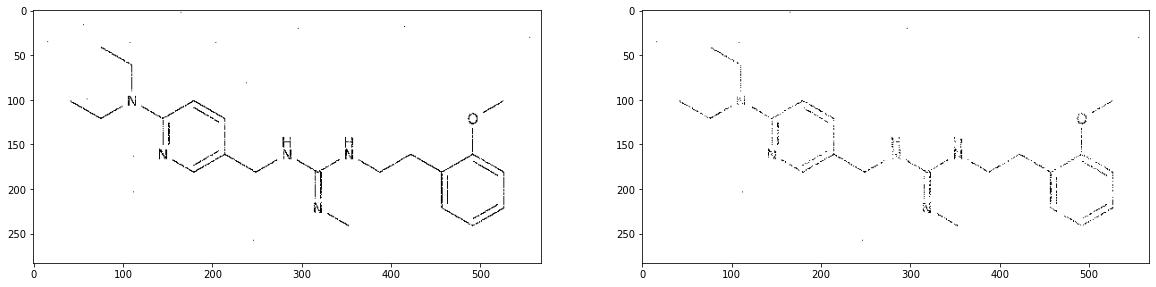

pixel count 1362
new pixel count 1024


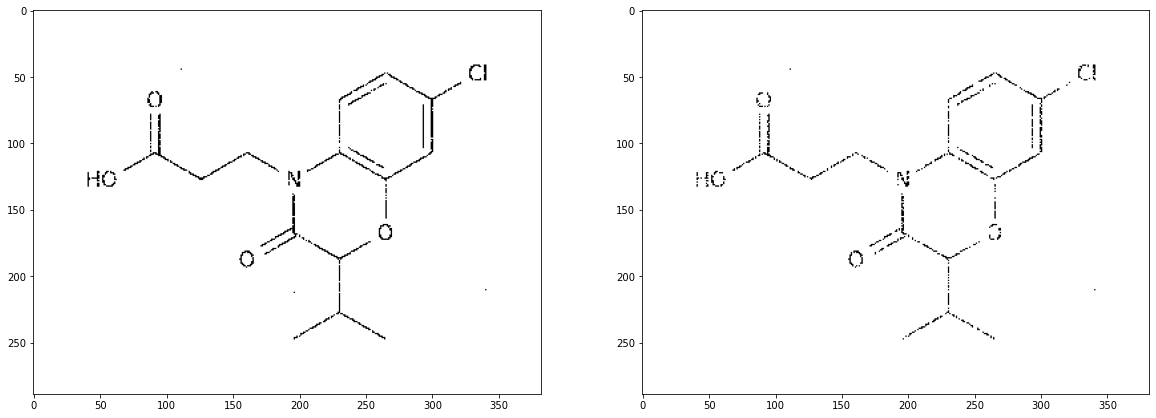

pixel count 1137
new pixel count 1024


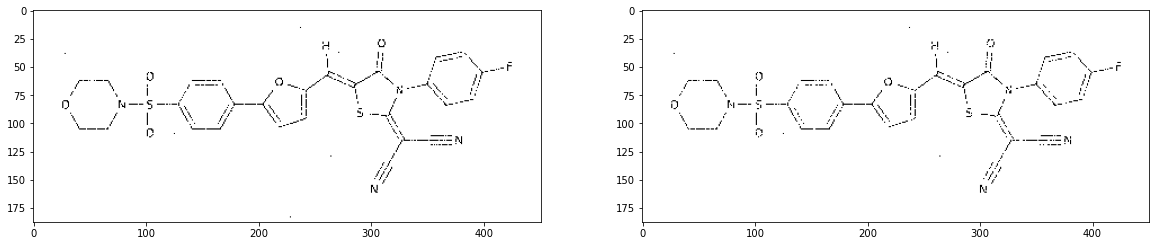

pixel count 1397
new pixel count 1024


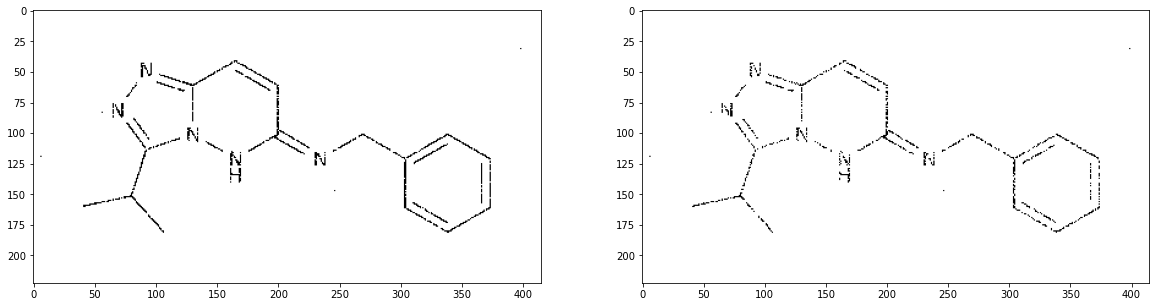

pixel count 1403
new pixel count 1024


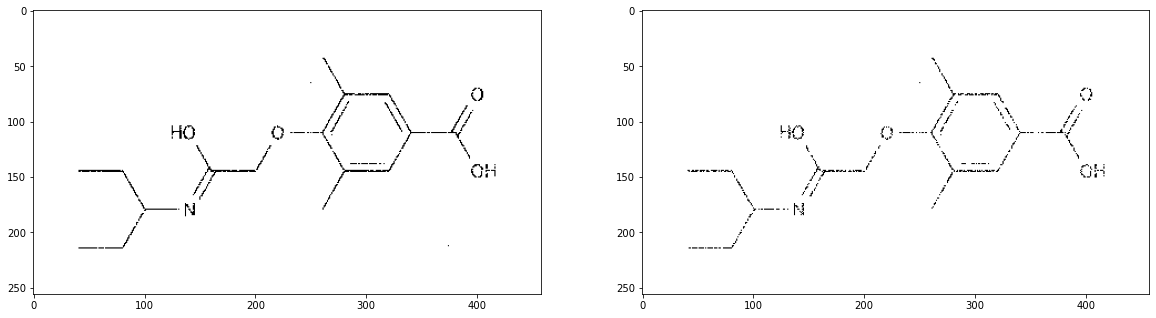

pixel count 1120
new pixel count 1024


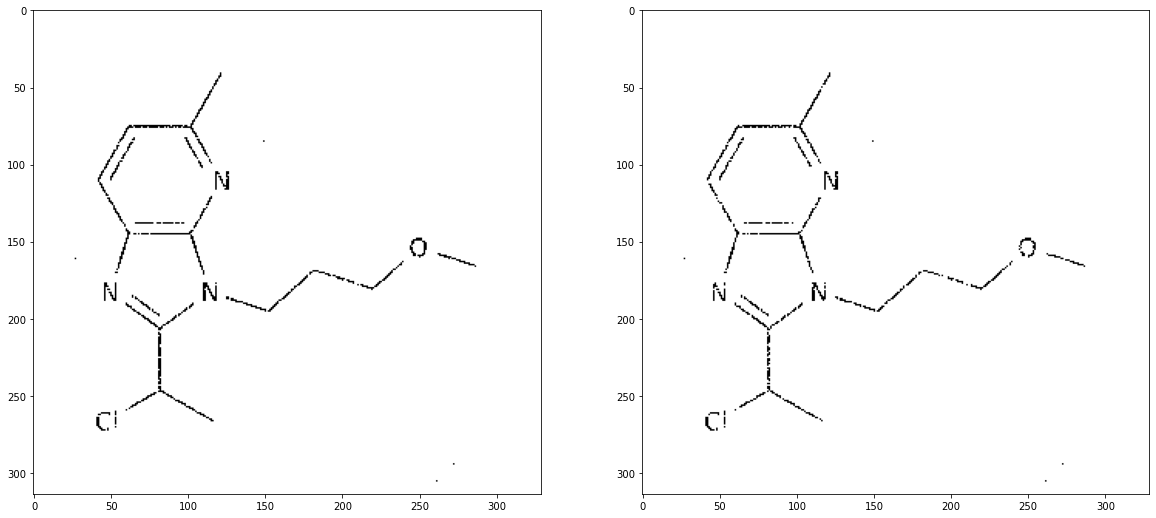

pixel count 2388
new pixel count 1024


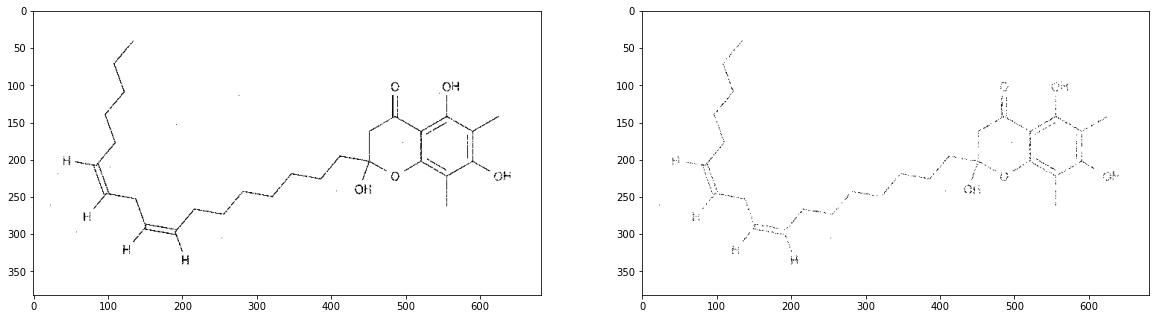

pixel count 1837
new pixel count 1024


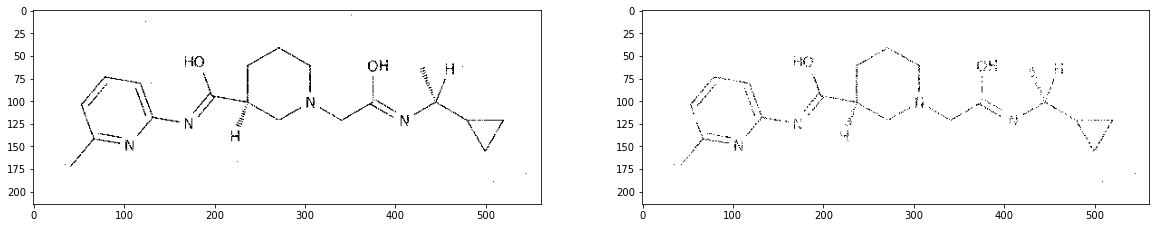

pixel count 2560
new pixel count 1024


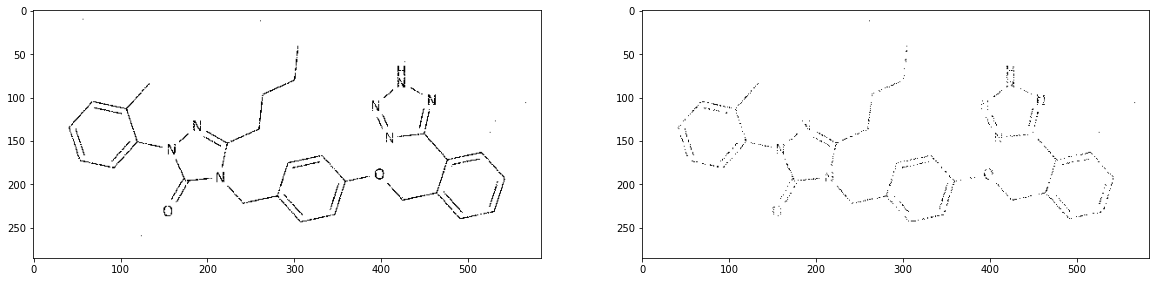

pixel count 1360
new pixel count 1024


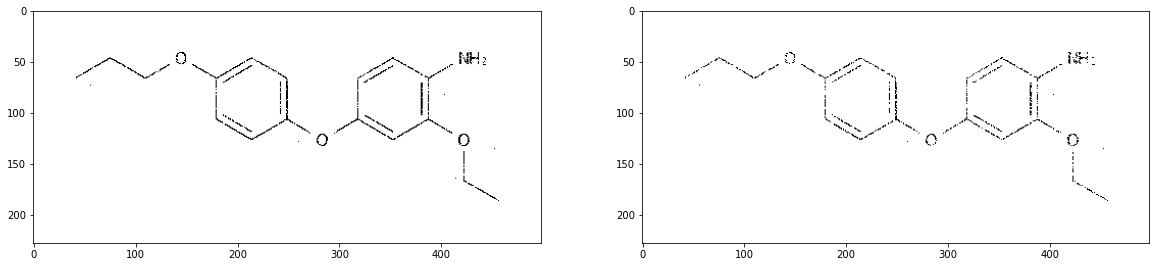

pixel count 1987
new pixel count 1024


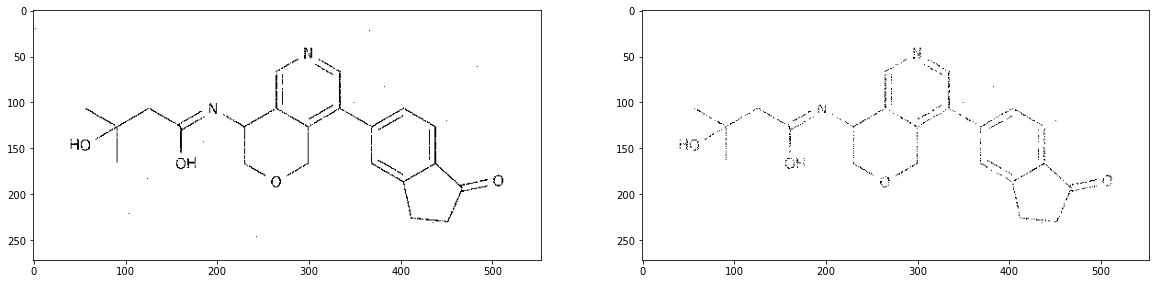

pixel count 3010
new pixel count 1024


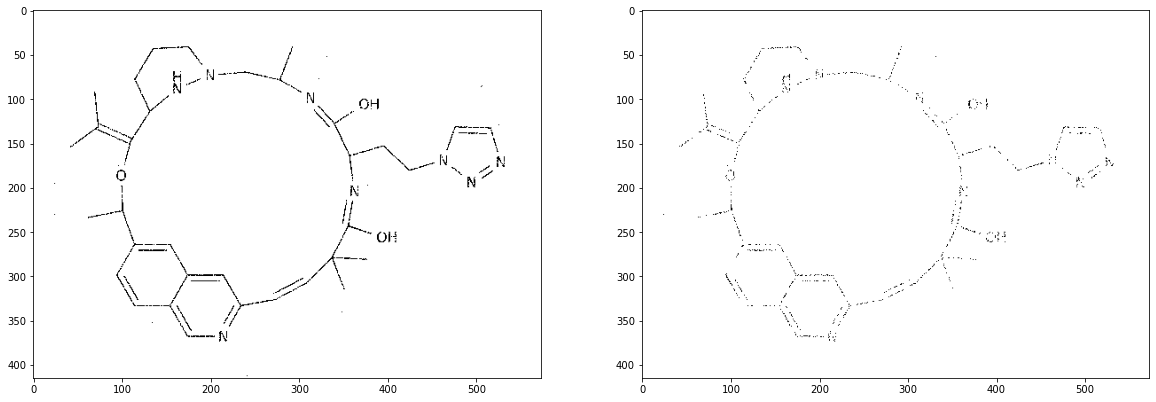

pixel count 2129
new pixel count 1024


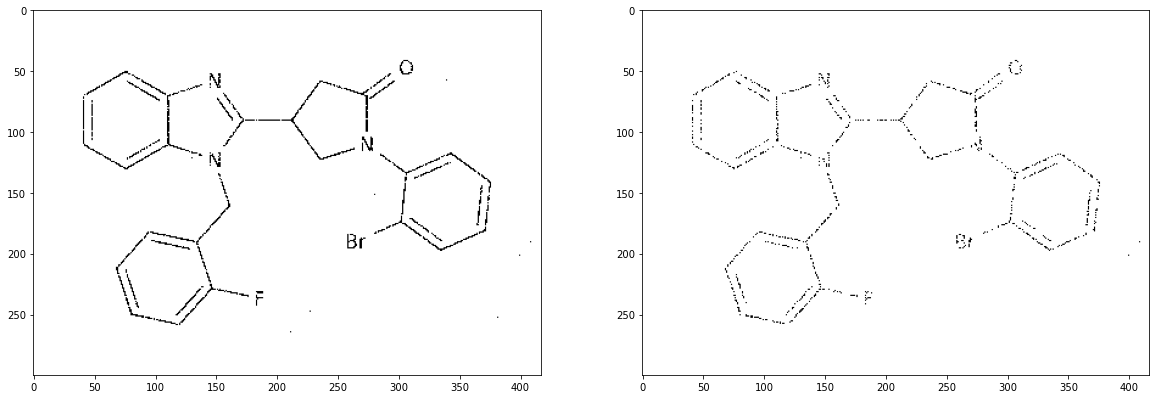

pixel count 1142
new pixel count 1024


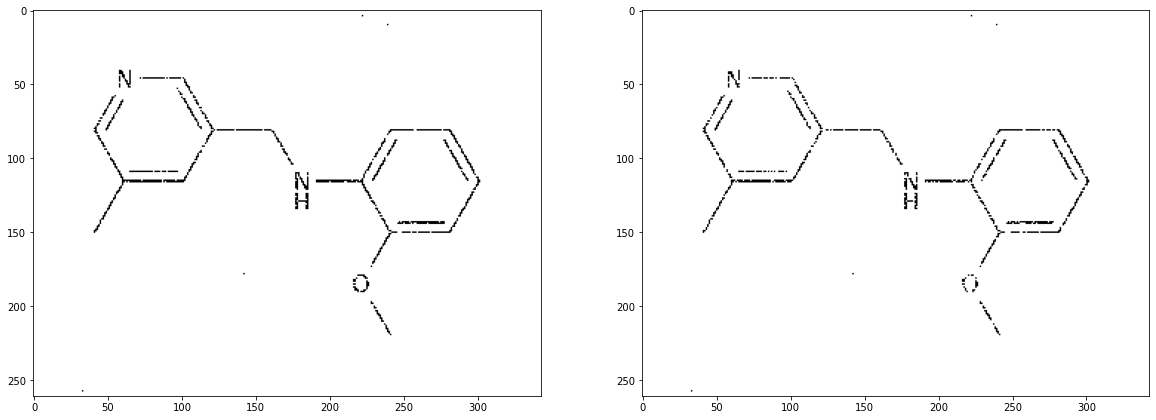

pixel count 2602
new pixel count 1024


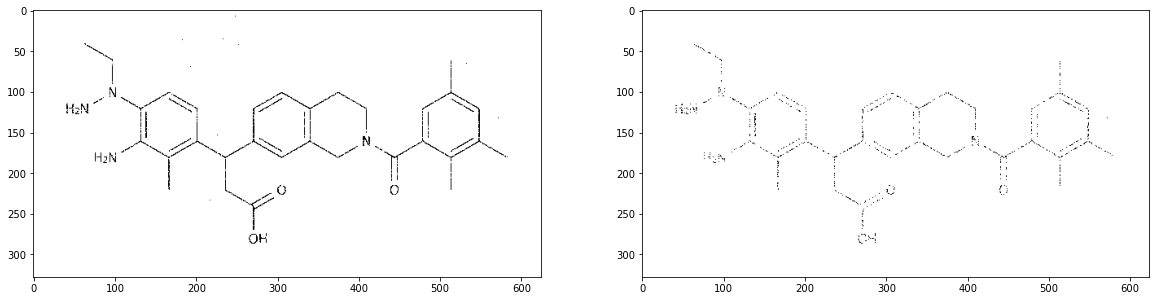

pixel count 1522
new pixel count 1024


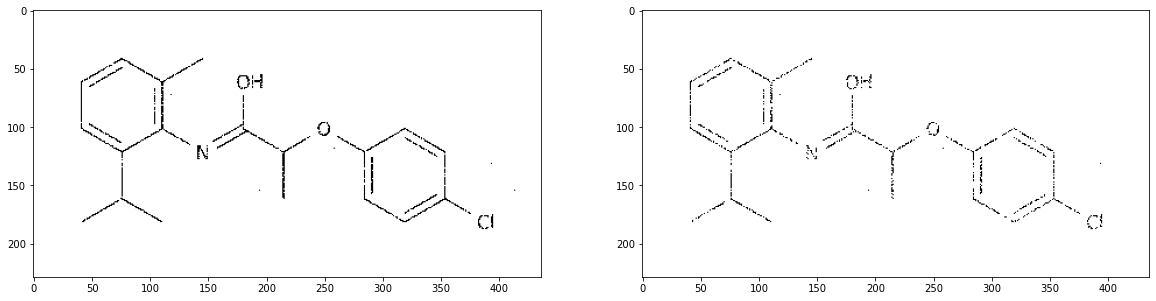

pixel count 1288
new pixel count 1024


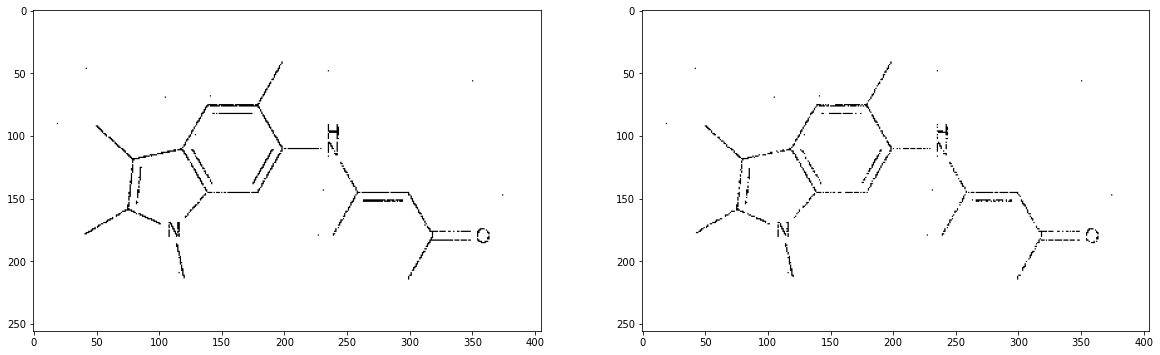

pixel count 1285
new pixel count 1024


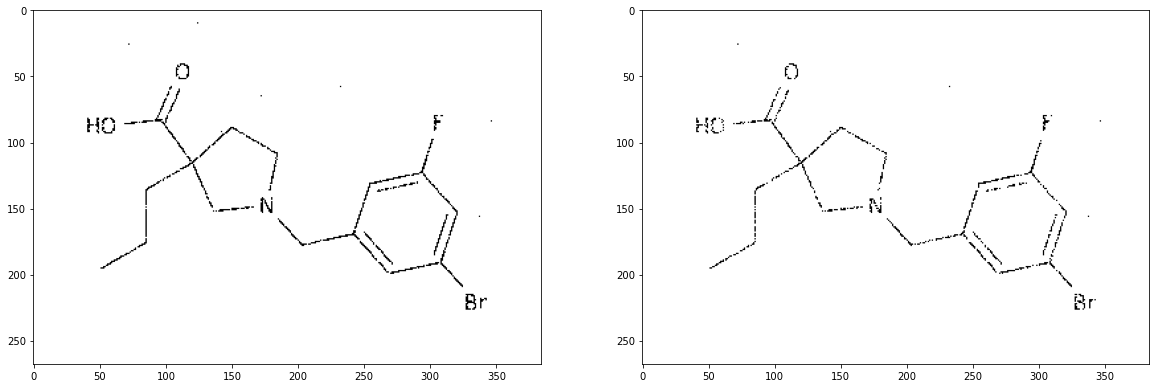

pixel count 1392
new pixel count 1024


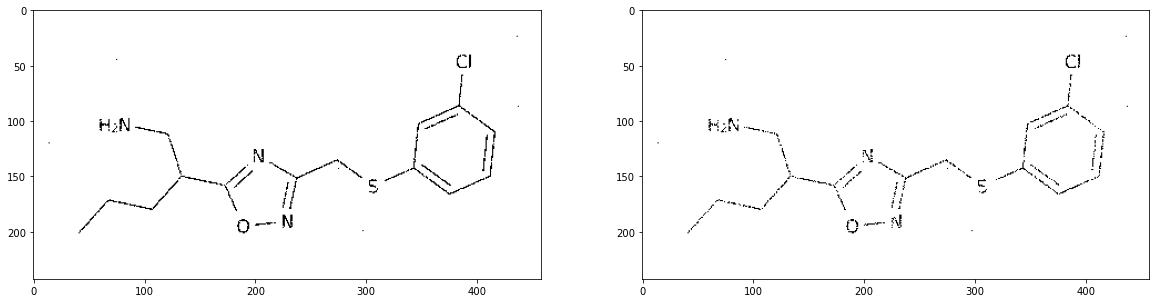

pixel count 1362
new pixel count 1024


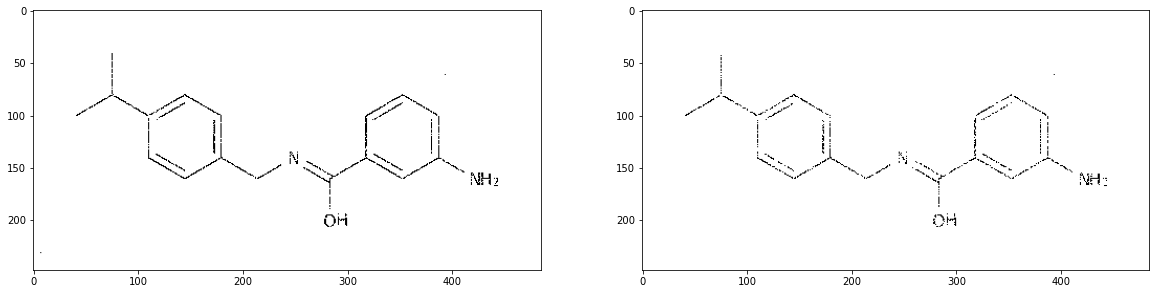

pixel count 1109
new pixel count 1024


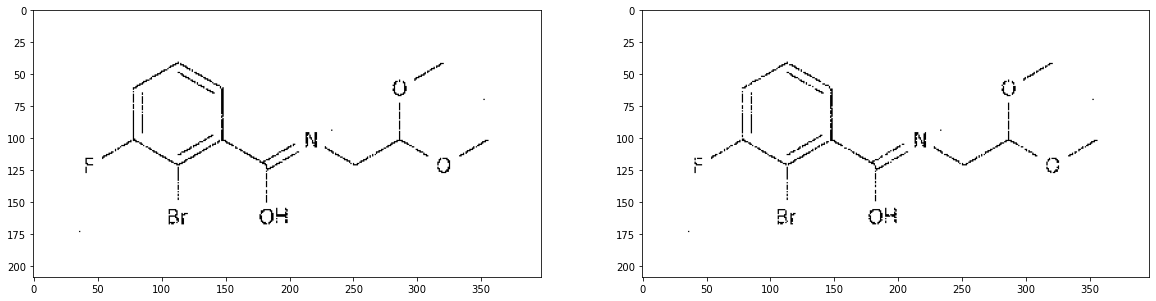

pixel count 2707
new pixel count 1024


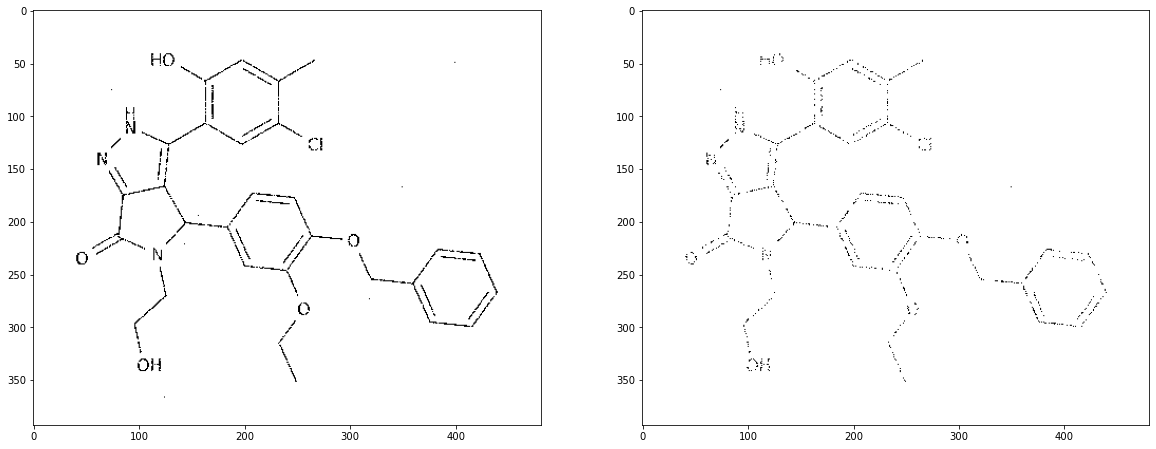

pixel count 2785
new pixel count 1024


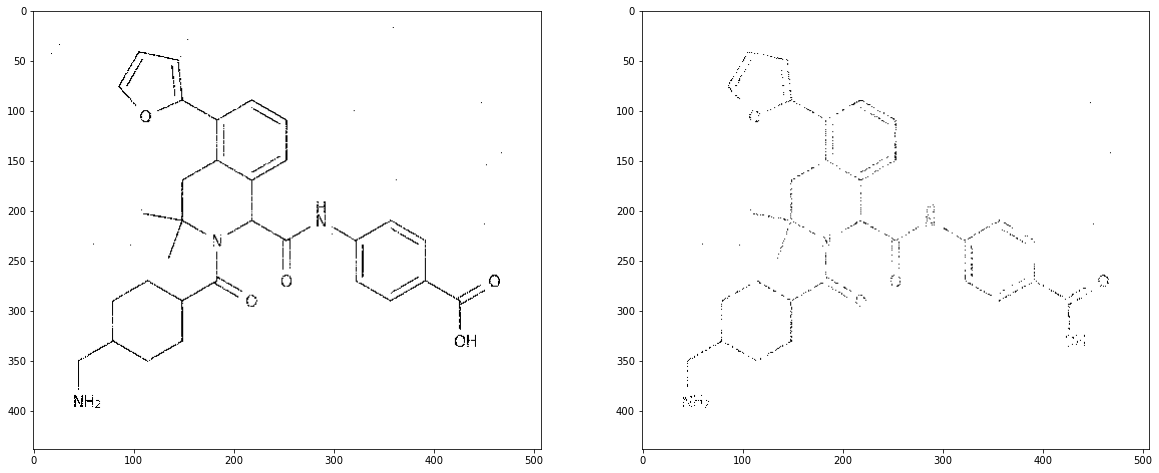

pixel count 1196
new pixel count 1024


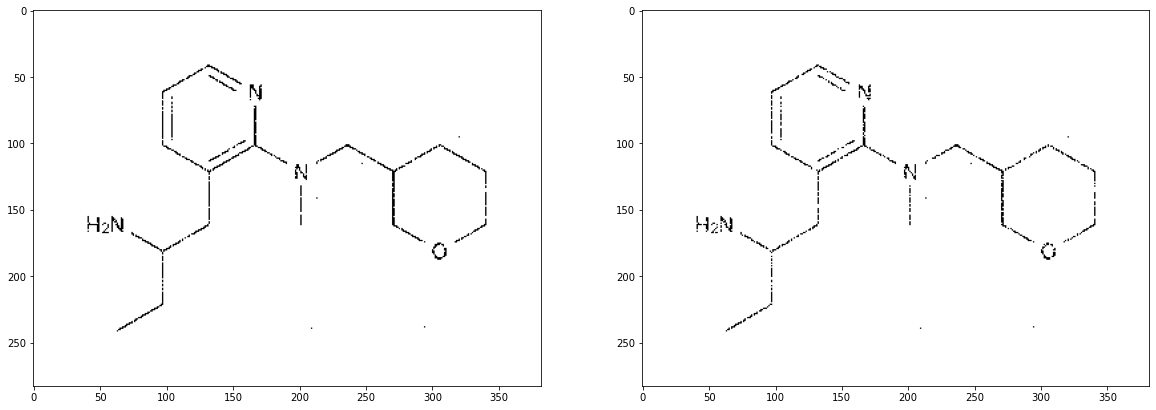

pixel count 1057
new pixel count 1024


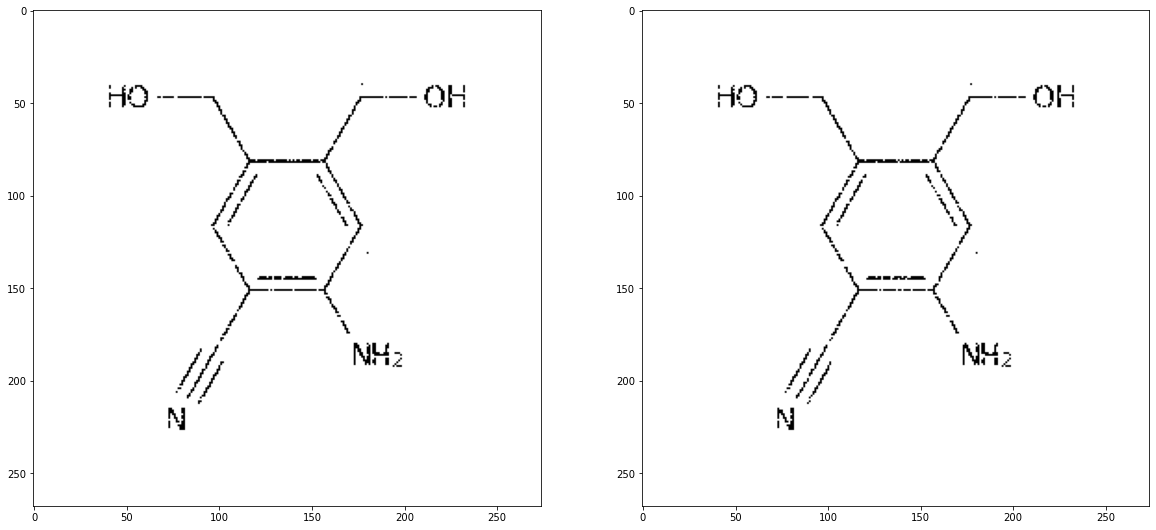

pixel count 1512
new pixel count 1024


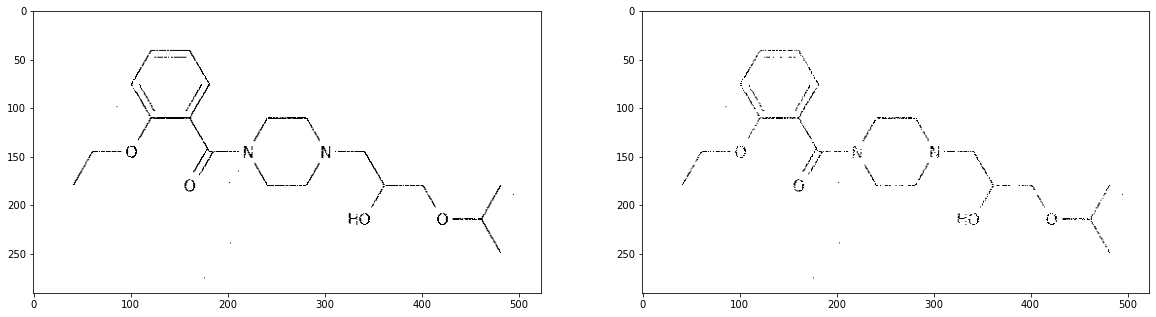

pixel count 1307
new pixel count 1024


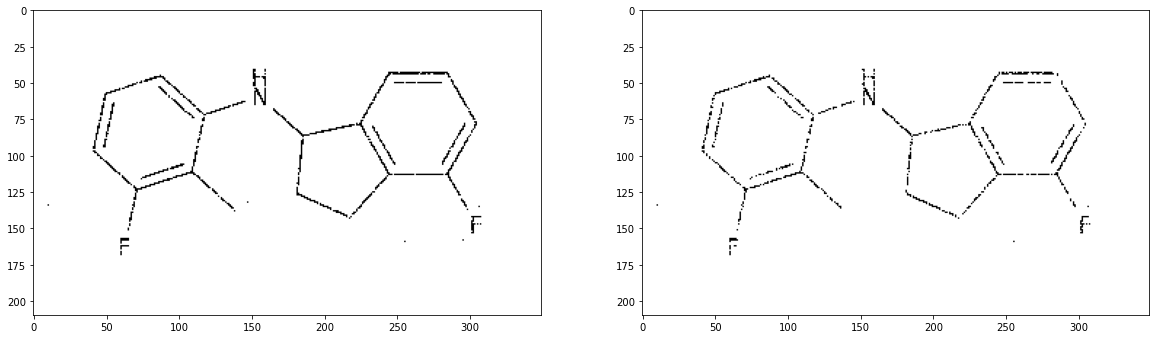

pixel count 1428
new pixel count 1024


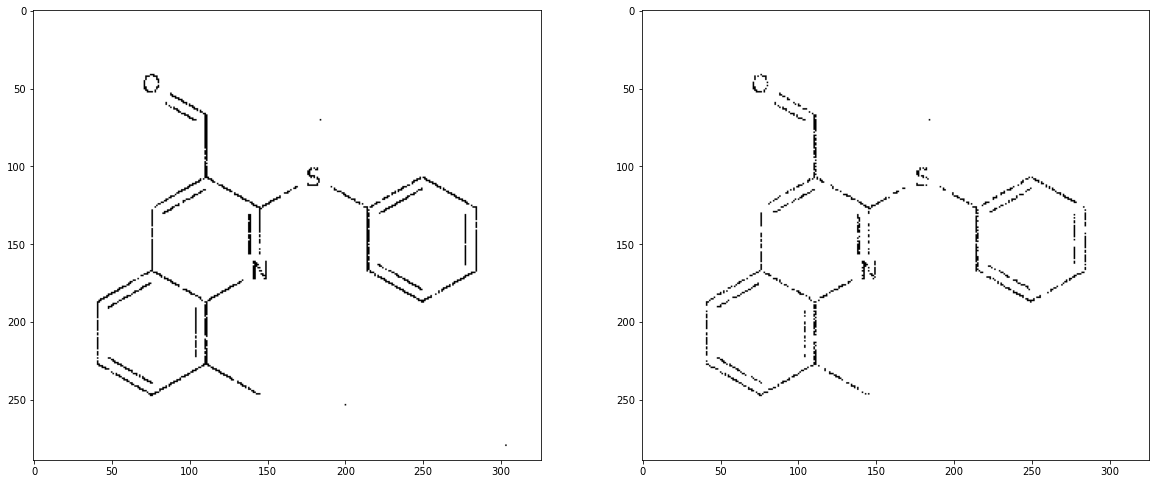

pixel count 1870
new pixel count 1024


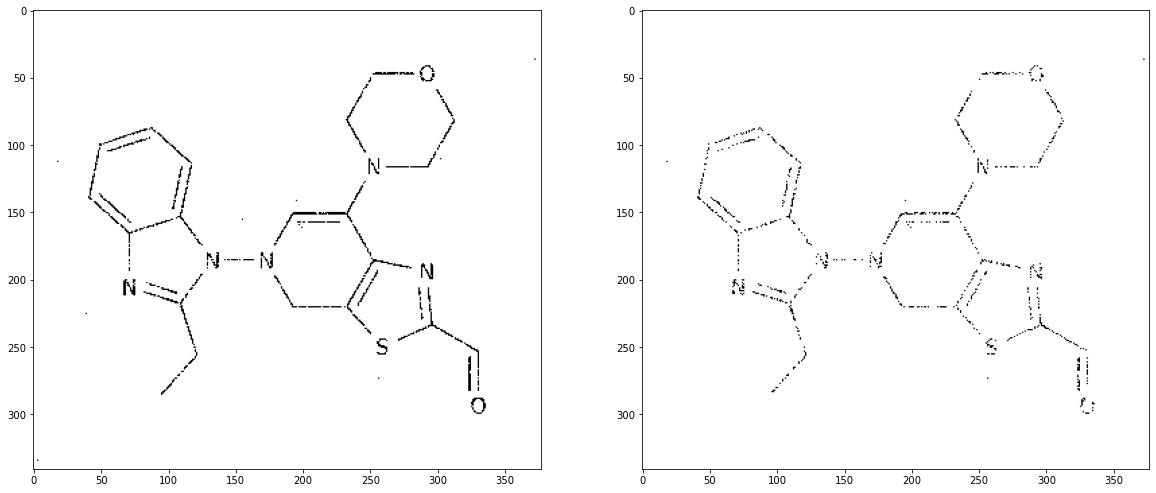

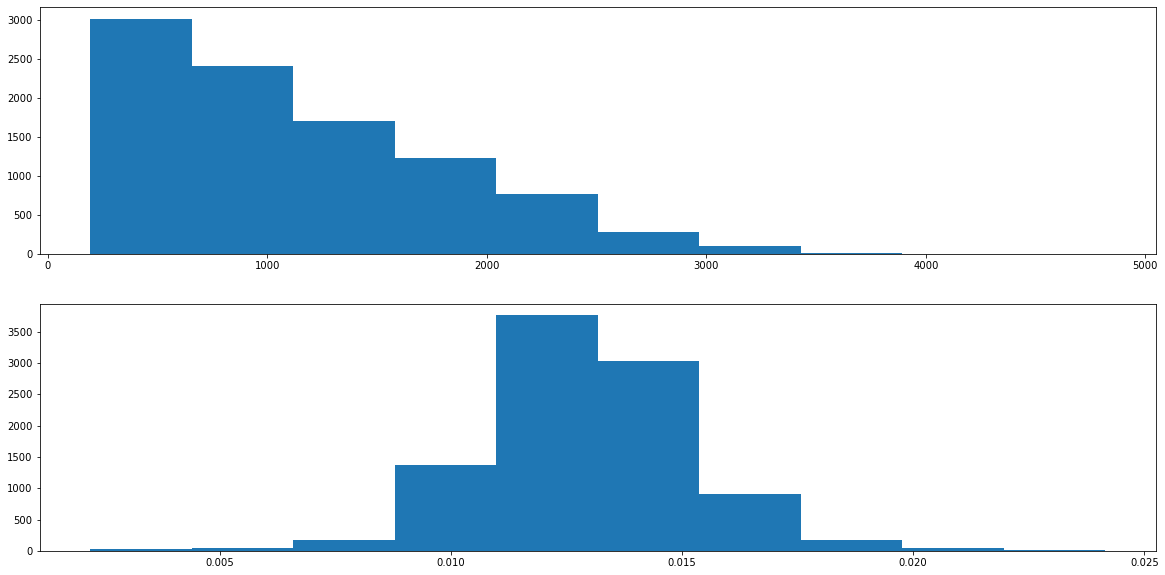

In [68]:
pcs, sparsities = check_images(labels, threshold=1024)

plt.subplot(2, 1, 1)
plt.hist(pcs)
plt.subplot(2, 1, 2)
plt.hist(sparsities)
plt.show()